##

::: {.notes}
Hey there! Imagine you're driving to work every day. Some days, you zip through traffic without a hitch. Other days, you get stuck in jams or hit every red light. Now, think of the ups and downs of your drive as return volatility in the stock market.
:::

:::{.absolute top=75 left=200 width=350 height=100}
$$
\sigma = \sqrt{\frac{\sum_{i=1}^{n}(R_i - \mu)^2}{n-1}}
$$
:::


:::{.absolute top=250 left=100 width=600 height=400}
  
:::{.incremental .smaller}
1. Calculate the average return ($\mu$).
2. Subtract the average return from each individual return $R_{i} - \mu$.
3. Square these differences.
4. Sum up all the squared differences.
5. Divide by the number of returns minus one ($n-1$).
6. Take the square root of the result. 
 
:::
:::


##


In [15]:
%%capture
### Example Code:
import yfinance as yf
import numpy as np

# Get historical data
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
returns = data['Adj Close'].pct_change().dropna()

# Calculate average return
mu = np.mean(returns)

# Calculate squared differences from the mean
squared_diff = (returns - mu) ** 2

# Calculate variance
variance = np.sum(squared_diff) / (len(returns) - 1)

# Calculate volatility
volatility = np.sqrt(variance)

print("Volatility:", volatility)


In [16]:
%%capture

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Fetch historical data for Apple
data = yf.download('AAPL', start='2022-01-01', end='2023-12-31')
returns = data['Adj Close'].pct_change().dropna()

# Calculate the moving average volatility
window = 63  # 21 trading days in a month 
rolling_volatility = returns.rolling(window=window).std() * np.sqrt(260)



## 

:::{.absolute top="10" left="10" width="900" height="900"}

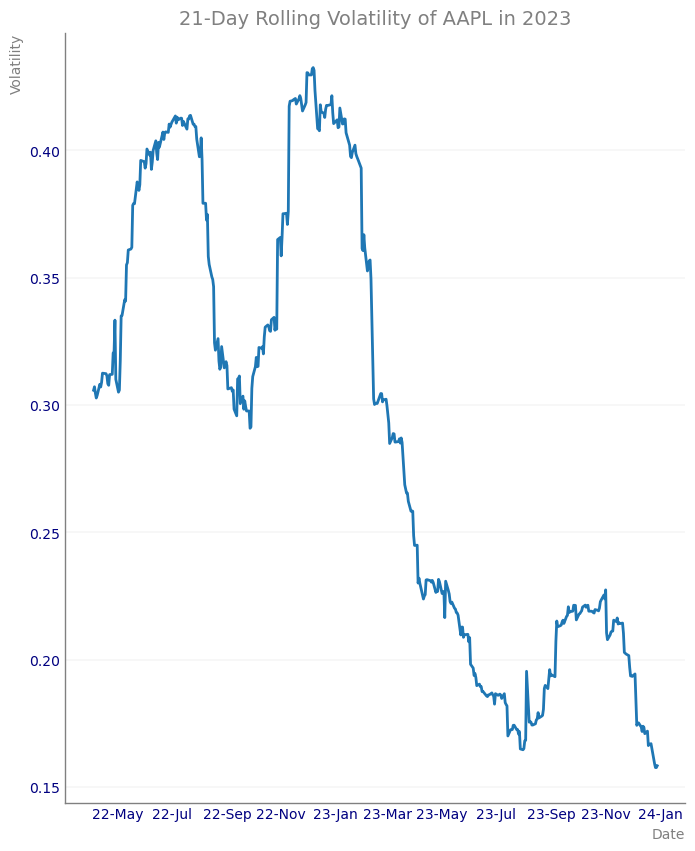

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('ddm-chart.mplstyle')
fig, ax = fig = plt.subplots()
ax.plot(rolling_volatility, linewidth=2)

# Customizing the plot
plt.title('21-Day Rolling Volatility of AAPL in 2023', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility')

# Show plot
plt.show()

:::
